In [37]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## Import Data and begin basic observations

In [39]:
# import data set
# help the programm identify the missing values
missing_value_formats = ["x",'']
df = pd.read_csv('Microsoft_Stock.csv', header = 0, na_values = missing_value_formats)

In [40]:
print(df.head())

                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB
None


In [42]:
print(df.describe())

              Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472   106.294533   107.422091  3.019863e+07
std      56.691333    57.382276    55.977155    56.702299  1.425266e+07
min      40.340000    40.740000    39.720000    40.290000  1.016120e+05
25%      57.860000    58.060000    57.420000    57.855000  2.136213e+07
50%      93.990000    95.100000    92.920000    93.860000  2.662962e+07
75%     139.440000   140.325000   137.825000   138.965000  3.431962e+07
max     245.030000   246.130000   242.920000   244.990000  1.352271e+08


In [43]:
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


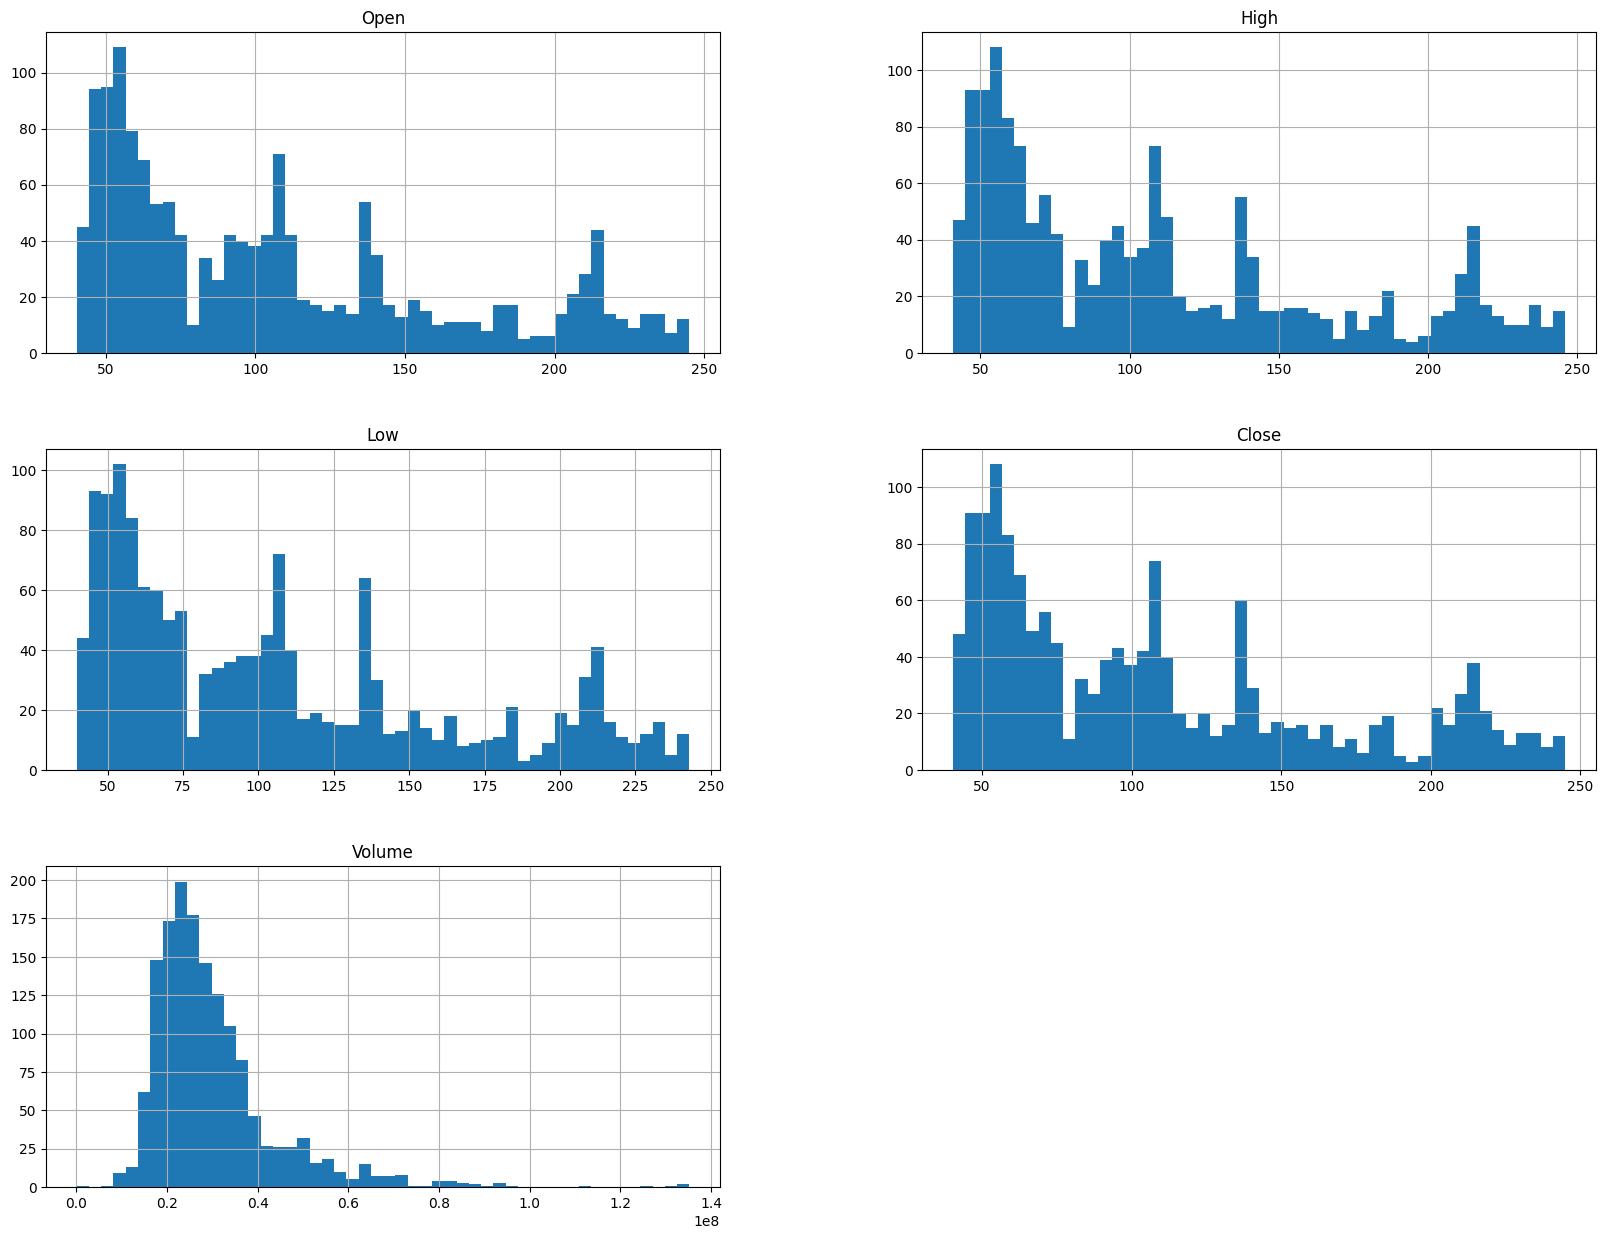

In [48]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
# Convert the 'Date' column in the DataFrame df to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of df
df.set_index('Date', inplace=True)

# new 'time_series' create 'Close' column 
time_series = df['Close'] 

            Open      High       Low     Close    Volume
Open    1.000000  0.999775  0.999757  0.999541  0.054072
High    0.999775  1.000000  0.999622  0.999731  0.062573
Low     0.999757  0.999622  1.000000  0.999767  0.044514
Close   0.999541  0.999731  0.999767  1.000000  0.052153
Volume  0.054072  0.062573  0.044514  0.052153  1.000000


In [49]:
# Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
test_stationarity(time_series)

Results of Dickey-Fuller Test:
Test Statistic                    1.737136
p-value                           0.998216
#Lags Used                       24.000000
Number of Observations Used    1486.000000
Critical Value (1%)              -3.434758
Critical Value (5%)              -2.863487
Critical Value (10%)             -2.567807
dtype: float64


The Dickey_Fuller test results show that the time series is not stationary, as thr p-value is greater than 0.05

Also the Test Statistic is greater thanthe Critical Value 

Test Statistic              =   1.737136 

Critical Value (1%)         =   -3.434758 

Critical Value (5%)         =   -2.863487

Critical Value (10%)        =   -2.567807

In [50]:
# Differencing the time_series
diff_time_series = time_series.diff().dropna()

# Run test again
test_stationarity(diff_time_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.003833e+01
p-value                        1.519594e-17
#Lags Used                     2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64
